### The Normal Equation

In [ ]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [ ]:
import matplotlib.pyplot as plt

#plt.scatter(X,y)
plt.plot(X,y,"b.")
plt.xlabel('X1')
plt.ylabel('y', rotation=0)
plt.axis([0,2,0,15])

plt.show()


In [ ]:
#concatenate array of ones to X
X_b = np.c_[np.ones((100,1)),X]

#Normal Equation (XT*X)^-1*(XT)*(y)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Theta Best:", theta_best)
#our function for y was 4 + 3X +randomness
#Theta best tells us the best theta to minimize error: (theta best0) + (theta best1)X 

In [ ]:
#make some predictions using Theta Best
X_new = np.array([[0],[2]])
print("X new",X_new)

X_new_b = np.c_[np.ones((2,1)),X_new]
print("X new b",X_new_b)

y_predict = X_new_b.dot(theta_best)
print("Predicted:", y_predict)

In [ ]:
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.xlabel('X1')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()

In [ ]:
#Liner regression with Scikit-Learn
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
print("Intercept:", lin_reg.intercept_, "Coefficient", lin_reg.coef_)

print("X_new:",lin_reg.predict(X_new))

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("Theta Best:", theta_best_svd)

print("pseudoinverse:",np.linalg.pinv(X_b).dot(y))

### Batch Graident Descent

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for interation in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

print("Theta:", theta)

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

In [ ]:
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

### Stochastic Gradient Descent

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)        
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients

print("Theta:", theta)

plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [ ]:
#stochastic gradient descent with scikit-learn
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

print("Intercept:", sgd_reg.intercept_)
print("Coefficient:", sgd_reg.coef_)


### Polynomial Regression

In [24]:
import numpy as np
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

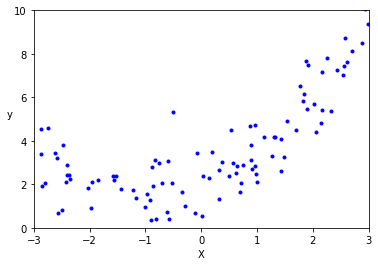

In [25]:
import matplotlib.pyplot as plt

plt.plot(X,y,"b.")
plt.xlabel('X')
plt.ylabel('y', rotation=0)
plt.axis([-3,3,0,10])

plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

print("X[0]:", X[0])
print("X_poly[0]", X_poly[0])

X[0]: [-2.4829776]
X_poly[0] [-2.4829776   6.16517778]


In [27]:
from sklearn.linear_model import LinearRegression

lin_Reg = LinearRegression()
lin_Reg.fit(X_poly, y)

print("Intercept:", lin_Reg.intercept_)
print("Coefficient:", lin_Reg.coef_)

Intercept: [2.0208578]
Coefficient: [[0.98020817 0.47562039]]


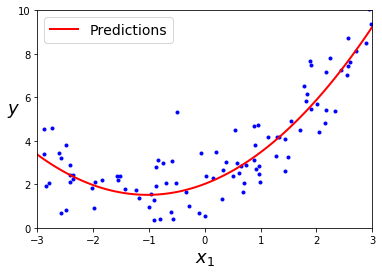

In [28]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_Reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [ ]:
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X,y,"b.")
plt.axis([-3,3,0,10])
plt.xlabel('X1')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()

### Learning Curves

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val")
    plt.axis([0,80,0,3])

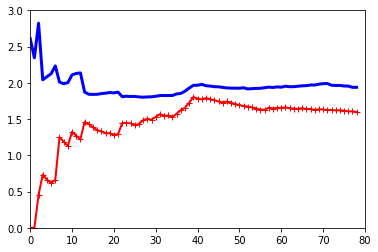

In [46]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

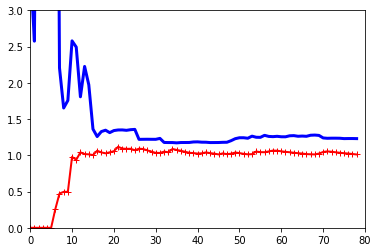

In [54]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

### Regularized Linear Models: Ridge Regression